In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [ ]:
r0 = 0.04
a = 0.1
b = 0.02
gamma = 0.12
T = 2
N = 1000
step = T / N

ti = np.linspace(0, T, N)

In [ ]:
def G(size):
    res = []
    for _ in range(size):
        res.append(np.random.normal())
    return res


def r_t(G):
    res = [r0]
    for i in range(N):
        res.append(
            res[-1] + a * (b - res[-1]) * step + gamma * np.sqrt(step) * G[i - 1]
        )
    return res

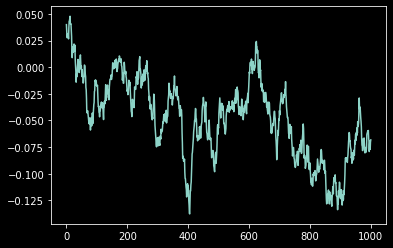

In [ ]:
G_sample = G(N)
r_t_sample = r_t(G_sample)

plt.figure()
plt.plot(r_t_sample)
plt.show()

In [ ]:
n = 1000

In [ ]:
B_list = []
for _ in range(n):
    B_list.append(np.exp(-step * np.sum(r_t(G(N)))))
B = np.mean(B_list)
print("Prix ZC = {}".format(B))

Prix ZC = 0.9417326903338414


In [ ]:
S0 = 30

In [ ]:
def sigma(t, x):
    return 0.15 * (1 + np.sqrt(t) + (x + 1) / (1 + x**2))


def S_t(G1, G2):
    res = [S0]
    for i in range(N):
        res.append(
            res[-1]
            + sigma(ti[i - 1], res[-1])
            * res[-1]
            * (
                (1 / 3) * np.sqrt(step) * G1[i]
                + (2 * np.sqrt(2) / 3) * np.sqrt(step) * G2[i]
            )
        )
    return res

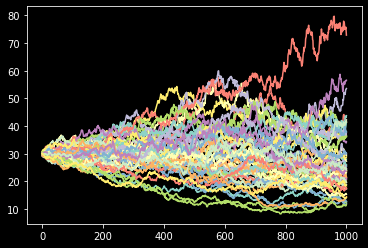

In [ ]:
plt.figure()

for _ in range(50):
    aux = S_t(G(N), G(N))
    plt.plot(aux)
plt.show()

In [ ]:
n = 1000
payoff_act_list = []
for _ in range(n):
    G1 = G(N)
    G2 = G(N)
    S = S_t(G1, G2)
    rt = r_t(G1)
    payoff_act_list.append(max(0, S[int(np.ceil(T / 2))] - S[-1]) * np.exp(-rt[-1] * T))
print("V0 = {}".format(np.mean(payoff_act_list)))

V0 = 5.477064990568607


In [ ]:
n = 1000
K = np.linspace(0, 70, 8)
for strike in K:
    payoff_act_list = []
    for _ in range(n):
        G1 = G(N)
        G2 = G(N)
        S = S_t(G1, G2)
        rt = r_t(G1)
        payoff_act_list.append(max(0, (strike - np.mean(S))) * np.exp(-rt[-1] * T))
    print("V0(K={}) = {}".format(strike, np.mean(payoff_act_list)))

V0(K=0.0) = 0.0
V0(K=10.0) = 0.0
V0(K=20.0) = 0.059356445823261925
V0(K=30.0) = 2.6117774718731215
V0(K=40.0) = 10.744684133218078
V0(K=50.0) = 20.598517236105735
V0(K=60.0) = 29.966178264069093
V0(K=70.0) = 40.009321061166055
